In [35]:
import survey
import numpy as np
import thinkstats as ts
import Pmf
import matplotlib.pyplot as plt

In [1]:
table = survey.Pregnancies()
table.ReadRecords()
print('Number of pregnancies', len(table.records))

('Number of pregnancies', 13593)


In [2]:
print len([rec for rec in table.records if rec.outcome == 1])

9148


In [3]:
print len([rec for rec in table.records if rec.outcome ==1 and rec.birthord == 1])
print len([rec for rec in table.records if rec.outcome ==1 and rec.birthord != 1])

4413
4735


In [4]:
13593 - 4445 - 4413

4735

In [15]:
print np.mean([rec.prglength for rec in table.records if rec.outcome == 1 and rec.birthord == 1])
print np.mean([rec.prglength for rec in table.records if rec.outcome == 1 and rec.birthord != 1])

38.6009517335
38.5229144667


In [17]:
(0.6009517335 - 0.5229144667) * 7 * 24

13.1102608224

In [21]:
def Pumpkin():
    data = [1, 1, 1, 3, 3, 591]
    mu, var = ts.MeanVar(data)
    print mu
    print var
    print np.sqrt(var)
    
Pumpkin()

100.0
48217.0
219.583697027


In [25]:
gestation_times = [rec.prglength for rec in table.records if rec.outcome ==1 and rec.birthord == 1]
var = ts.Var(gestation_times)
std = np.sqrt(var)
print std

2.79158506982


In [27]:
hist = Pmf.MakeHistFromList([1,2,2,3,5])
print hist

In [28]:
hist.Freq(2)

2

In [29]:
hist.Freq(50)

0

In [30]:
hist.Values()

[1, 2, 3, 5]

In [31]:
for val in sorted(hist.Values()):
    print val, hist.Freq(val)

1 1
2 2
3 1
5 1


In [33]:
for val, freq in hist.Items():
    print val, freq

 1 1
2 2
3 1
5 1


In [34]:
def Mode(hist):
    most_freq = 0
    most_freq_val = 0
    for val, freq in hist.Items():
        if freq > most_freq:
            most_freq = freq
            most_freq_val = val
    return most_freq_val

Mode(hist)

2

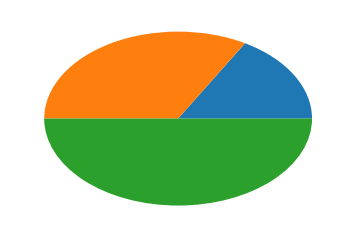

In [36]:
plt.pie([1,2,3])
plt.show()

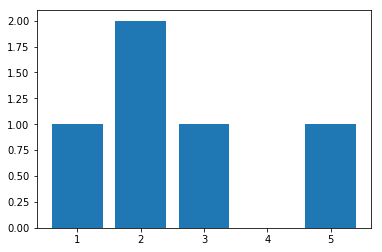

In [37]:
vals, freqs = hist.Render()
rectangles = plt.bar(vals, freqs)
plt.show()

In [40]:
pmf = Pmf.MakePmfFromList([1,2,2,3,5])
print pmf

In [41]:
pmf.Prob(2)

0.4

In [47]:
pmf.Incr(2,0.2)
pmf.Prob(2)

0.5333333333333334

In [43]:
pmf.Mult(2, 0.5)
pmf.Prob(2)

0.30000000000000004

In [48]:
pmf.Total()

1.2000000000000002

In [49]:
pmf.Normalize()
pmf.Total()

1.0

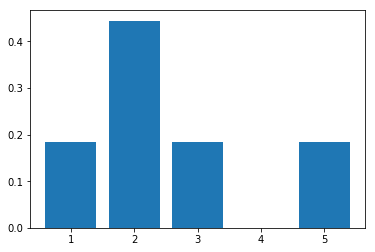

In [50]:
vals, freq = pmf.Render()
plt.bar(vals, freq)
plt.show()

In [52]:
def RemainingLifetime(lifetimes_pmf, age):
    cpy = lifetimes_pmf.Copy()
    for val in sorted(cpy.Values()):
        if val < age:
            cpy.Mult(val, 0)
    cpy.Normalize()
    return cpy

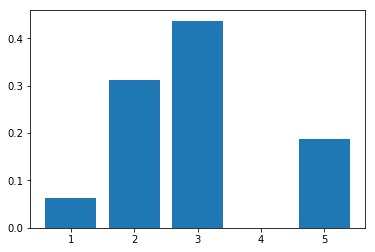

In [57]:
pmf = Pmf.MakePmfFromList([1,2,2,2,2,2,3,3,3,3,3,3,3,5,5,5])
vals, freqs = pmf.Render()
plt.bar(vals, freqs)
plt.show()

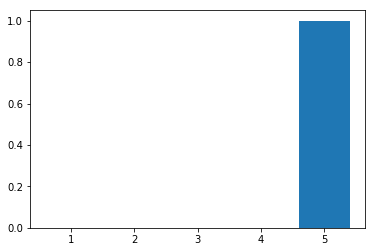

In [59]:
pmf2 = RemainingLifetime(pmf, 4)
vals, freqs = pmf2.Render()
plt.bar(vals, freqs)
plt.show()

In [68]:
def PmfMean(pmf):
    mean = 0.0
    for val, freq in pmf.Items():
        mean += val * freq
    return mean

print PmfMean(pmf2)
print PmfMean(pmf)
print Pmf.Pmf.Mean(pmf2)
print Pmf.Pmf.Mean(pmf)

5.0
2.9375
5.0
2.9375


In [77]:
def PmfVariance(pmf):
    s = 0.0
    mean = PmfMean(pmf)
    for val, prob in pmf.Items():
        s += prob * (val - mean) ** 2
    return s

print PmfVariance(pmf)
print Pmf.Pmf.Var(pmf)
print PmfVariance(pmf2)
print Pmf.Pmf.Var(pmf2)

1.30859375
1.30859375
0.0
0.0
